MODELO MASA EXPONENCIAL
========

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

pi=np.pi

ro_a= 1.225 # kg/m3
ro_d= 1000 # kg/m3
#eta= 1.849e-5 # kg/m.s 
r_0= 50e-6 # m
g= 9.81 # m/s2

alpha= 0.25/2
velocidad_flujo= 0.05

y0=[0,0]

In [2]:
def modelo_exponencial_viscosidad(y, t, eta= 1.849e-5):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g ) - (9 *eta / (2 * ( r_0**2 * np.exp(-2*t*alpha) * ro_d))) * (y[1] - velocidad_flujo) + 3*alpha * (y[1] - velocidad_flujo)
    return dy

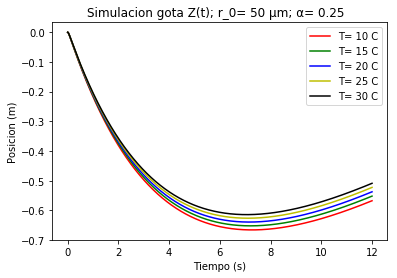

In [3]:
t_0= 0
t_max= 12
dt= 0.001
t= np.arange(t_0, t_max+dt, dt)

plt.figure()

solucion1= odeint(modelo_exponencial_viscosidad, y0, t, args=(1.778e-5,)) # T= 10 C
solucion2= odeint(modelo_exponencial_viscosidad, y0, t, args=(1.802e-5,))
solucion3= odeint(modelo_exponencial_viscosidad, y0, t, args=(1.825e-5,))
solucion4= odeint(modelo_exponencial_viscosidad, y0, t, args=(1.849e-5,))
solucion5= odeint(modelo_exponencial_viscosidad, y0, t, args=(1.872e-5,)) # T= 30 C

plt.plot(t,solucion1[:,0],'r', label='T= 10 C')
plt.plot(t,solucion2[:,0],'g', label='T= 15 C')
plt.plot(t,solucion3[:,0],'b', label='T= 20 C')
plt.plot(t,solucion4[:,0],'y', label='T= 25 C')
plt.plot(t,solucion5[:,0],'k', label='T= 30 C')


ax=plt.gca()
ax.set_title('Simulacion gota Z(t); r_0= 50 \N{greek small letter mu}m; \N{greek small letter alpha}= 0.25  ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (m)')
ax.legend()
plt.axis()
plt.show()

MODELO MASA LINEAL
========

In [4]:
alpha_lineal= 1.74e-10
t_inicial= 0
t_maximo= 3
t_step= 0.0001
time= np.arange(t_inicial, t_maximo+t_step, t_step)

def modelo_lineal_viscosidad(y, time, eta= 1.849e-5):
    
    radio=np.float_power(r_0**3 - (3*alpha_lineal*time/(4 * np.pi * ro_d)),1/3)
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g ) - (9 *eta / (2 * radio**2 * ro_d)) * (y[1] - velocidad_flujo) + (3 * alpha_lineal/(4*np.pi*radio**3*ro_d))  * y[1]
    return dy

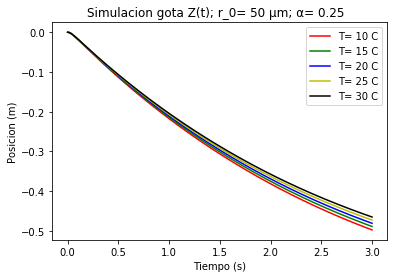

In [5]:
plt.figure()

solucion_lineal1= odeint(modelo_exponencial_viscosidad, y0, time, args=(1.778e-5,)) # T= 10 C
solucion_lineal2= odeint(modelo_exponencial_viscosidad, y0, time, args=(1.802e-5,))
solucion_lineal3= odeint(modelo_exponencial_viscosidad, y0, time, args=(1.825e-5,))
solucion_lineal4= odeint(modelo_exponencial_viscosidad, y0, time, args=(1.849e-5,))
solucion_lineal5= odeint(modelo_exponencial_viscosidad, y0, time, args=(1.872e-5,)) # T= 30 C

plt.plot(time,solucion_lineal1[:,0],'r', label='T= 10 C')
plt.plot(time,solucion_lineal2[:,0],'g', label='T= 15 C')
plt.plot(time,solucion_lineal3[:,0],'b', label='T= 20 C')
plt.plot(time,solucion_lineal4[:,0],'y', label='T= 25 C')
plt.plot(time,solucion_lineal5[:,0],'k', label='T= 30 C')


ax=plt.gca()
ax.set_title('Simulacion gota Z(t); r_0= 50 \N{greek small letter mu}m; \N{greek small letter alpha}= 0.25  ')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (m)')
ax.legend()
plt.axis()
plt.show()